# Demo of the metrics available

#### Import the needed libraries

In [ ]:
from time import time
from giskard_vision.landmark_detection.dataloaders.loaders import DataLoader300W
from giskard_vision.landmark_detection.visualisation.draw import draw_marks
from giskard_vision.landmark_detection.tests.performance import *
from giskard_vision.landmark_detection.marks.utils import compute_d_outers
from giskard_vision.landmark_detection.models.base import PredictionResult
import numpy as np

#### Load the main dataset

In [2]:
ds = DataLoader300W(dir_path="../datasets/300W/sample", batch_size=2)

#### Visualise the failing marks predictions 

`radius_limit` is defined as a fraction of the outer canthal distance (i.e. the distance between left and right eyes)

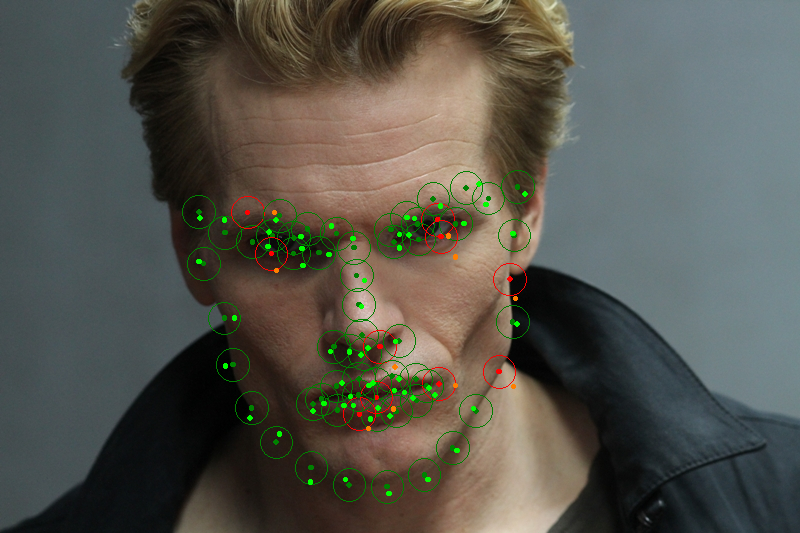

In [12]:
img_idx = 1
image, marks, meta = next(iter(ds))
noisy_marks = marks + 7 * np.random.randn(*marks.shape)

noisy_preds = PredictionResult(noisy_marks)


radius_limit = 0.08
d_outers = compute_d_outers(marks)
noisy_marks[:, ::2] += 0.05 * d_outers
failed_nerfs = NERFMarks.get(noisy_preds, marks, radius_limit=radius_limit)
colors_marks = ["red" if nerf else "green" for nerf in failed_nerfs[img_idx]]
colors_preds = [(255, 127, 0) if nerf else (0, 255, 0) for nerf in failed_nerfs[img_idx]]
draw_marks(
    image[img_idx],
    [marks[img_idx], noisy_marks[img_idx]],
    [colors_marks, colors_preds],
    [False, False],
    radius_limits=[d_outers[img_idx] * radius_limit, None],
)

#### Landmark-level available metrics

NERFMarks: Normalised Euclidean distance Range Failure rate

In [13]:
NERFMarks.get(noisy_preds, marks, radius_limit=0.05)[1]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.])

NERFImagesMean: Means per mark of Normalised Euclidean distance Range Failure rate across images

In [5]:
NERFImagesMean.get(noisy_preds, marks, radius_limit=0.05)

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 0.5, 1. , 0.5, 0.5,
       0. , 0.5, 1. , 1. , 0. , 1. , 0.5, 1. , 0.5, 0.5, 1. , 1. , 1. ,
       1. , 0.5, 1. , 0.5, 0.5, 0.5, 0. , 0.5, 1. , 1. , 0.5, 0. , 1. ,
       1. , 1. , 0.5, 1. , 0.5, 1. , 0.5, 1. , 1. , 0. , 1. , 1. , 0.5,
       1. , 1. , 1. , 0.5, 0.5, 1. , 1. , 0.5, 1. , 1. , 1. , 0.5, 1. ,
       1. , 1. , 0.5])

NERFImagesStd: Standard Deviations per mark of Normalised Euclidean distance Range Failure rate across images

In [6]:
NERFImagesStd.get(noisy_preds, marks, radius_limit=0.05)

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0. , 0.5, 0. , 0.5, 0.5,
       0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0.5, 0. , 0. , 0. ,
       0. , 0.5, 0. , 0.5, 0.5, 0.5, 0. , 0.5, 0. , 0. , 0.5, 0. , 0. ,
       0. , 0. , 0.5, 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5,
       0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0.5, 0. ,
       0. , 0. , 0.5])

NERFMarksMean: Mean of Normalised Euclidean distance Range Failure across landmarks

In [14]:
NERFMarksMean.get(noisy_preds, marks, radius_limit=0.05)[1]

0.38235294117647056

NERFMarksStd: Standard Deviation of Normalised Euclidean distance Range Failure across landmarks

In [15]:
NERFMarksStd.get(noisy_preds, marks, radius_limit=0.05)[1]

0.4859621071134796

NERFImages: Average number of images for which the Mean Normalised Euclidean distance Range Failure across landmarks is above failed_mark_ratio

In [16]:
NERFImages.get(noisy_preds, marks, radius_limit=0.5, failed_mark_ratio=0.1)

0.0

In [17]:
NERFImages.get(noisy_preds, marks, radius_limit=0.05, failed_mark_ratio=0.7)

0.5